# Explore LIDC labels

In [8]:
import pylidc as pl
from statistics import median_high
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Get all scans

In [2]:
scans = pl.query(pl.Scan)
print(scans.count())

1018


## Cluster annotations into nodules

In [3]:
ann_clusters = []
for scan in tqdm(scans, total=scans.count()):
    ann_clusters.append(scan.cluster_annotations(verbose=False))
print(len(ann_clusters))

100%|██████████| 1018/1018 [07:48<00:00,  2.17it/s]

1018


## Extract median labels for each nodule

In [4]:
anns = []
for scan in tqdm(ann_clusters):
    anns.append([{
        'malignancy': median_high([ann.malignancy for ann in cluster]),
        'texture': median_high([ann.texture for ann in cluster]),
        'spiculation': median_high([ann.spiculation for ann in cluster]),
        'lobulation': median_high([ann.lobulation for ann in cluster]),
        'margin': median_high([ann.margin for ann in cluster]),
        'sphericity': median_high([ann.sphericity for ann in cluster]),
        'calcification': median_high([ann.calcification for ann in cluster]),
        'internalStructure': median_high([ann.internalStructure for ann in cluster]),
        'subtlety': median_high([ann.subtlety for ann in cluster]),
    } for cluster in scan])

100%|██████████| 1018/1018 [00:00<00:00, 3027.66it/s]


## Calculate summary statistics for each label

In [5]:
nods = pd.DataFrame([nod for scan in anns for nod in scan])
nods.describe()

,malignancy,texture,spiculation,lobulation,margin,sphericity,calcification,internalStructure,subtlety
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000
mean,2.871369,4.449642,1.579404,1.693323,4.056960,3.935496,5.701622,1.014711,3.864202
std,1.062062,1.187359,1.004525,1.013433,1.140076,0.873071,0.886158,0.204133,1.146465
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
25%,2.000000,5.000000,1.000000,1.000000,4.000000,3.000000,6.000000,1.000000,3.000000
50%,3.000000,5.000000,1.000000,1.000000,4.000000,4.000000,6.000000,1.000000,4.000000
75%,3.000000,5.000000,2.000000,2.000000,5.000000,5.000000,6.000000,1.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000


## Plot label distributions

See [pylidc docs](https://pylidc.github.io/annotation.html) for attribute values of all annotations.

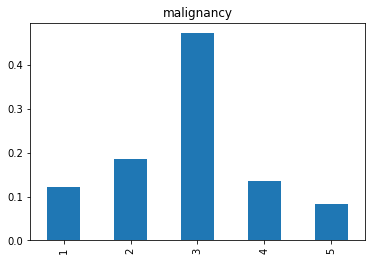

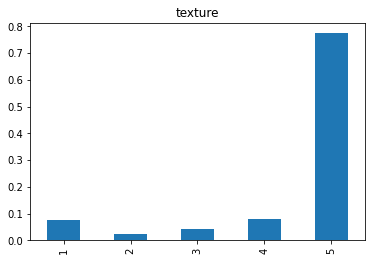

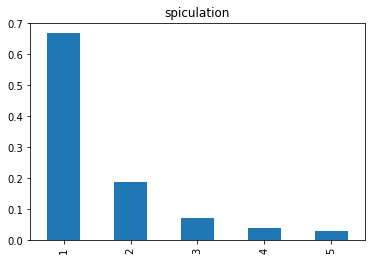

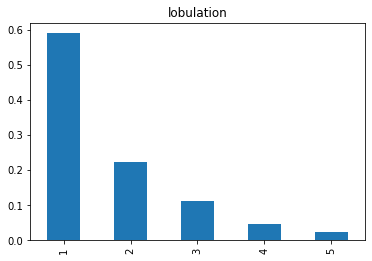

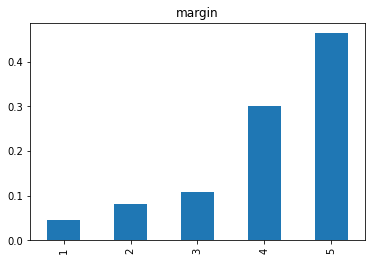

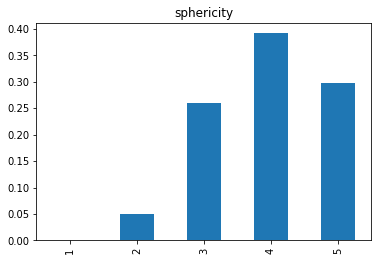

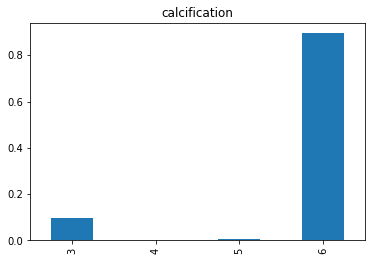

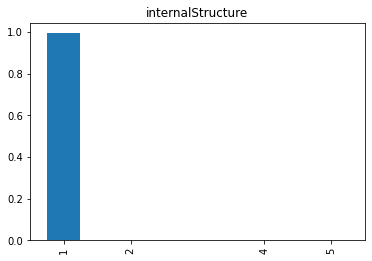

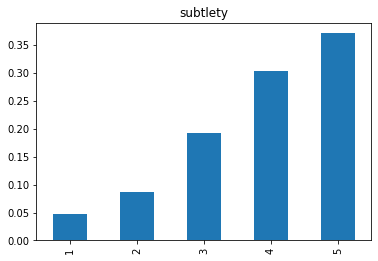

In [9]:
for col in nods.columns:
    nods[col].value_counts(normalize=True).plot(kind="bar")
    plt.title(col)
    plt.show()